# Introduction

The dataset contains loan information about 1 million potential borrowers of a specific bank, which is a peer to peer lending bank based in the Ireland. The complete dataset is from Lending Club, and it has been changed from Kaggle. My goal is to conduct data analysis to extract business insights from this large dataset. The first task is to export preliminary analysis of significant features in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

# Import dataset

In [2]:
data = pd.read_csv("loan_final313.csv")

In [3]:
data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [4]:
display(data.head())

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [5]:
type(data)

pandas.core.frame.DataFrame

# Feature 1 - Employment length

1.1 Outline

In [6]:
emp_len = data.iloc[:,4]
display(emp_len.head())

0    10.0
1     0.5
2    10.0
3    10.0
4     1.0
Name: emp_length_int, dtype: float64

1.2 Unique values

In [7]:
emp_len.unique()

array([10.  ,  0.5 ,  1.  ,  3.  ,  8.  ,  9.  ,  4.  ,  5.  ,  6.  ,
        2.  ,  7.  ,  6.05])

* The last value 6.05 seems like an outliner, however, there are 44,825 of them.

In [8]:
(emp_len == 6.05).sum()

44825

1.3 Basic statistics

In [9]:
emp_len.describe()

count    887379.000000
mean          6.050564
std           3.507405
min           0.500000
25%           3.000000
50%           6.050000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

* Notice that 75% percentile and max are both 10, which implies at least 1/4 of the clients have a employment length of 10 years.

1.4 Histogram

(array([127700.,  78870.,  70026.,  52529.,  55704.,  87775.,  44594.,
         43955.,  34657., 291569.]),
 array([ 0.5 ,  1.45,  2.4 ,  3.35,  4.3 ,  5.25,  6.2 ,  7.15,  8.1 ,
         9.05, 10.  ]),
 <a list of 10 Patch objects>)

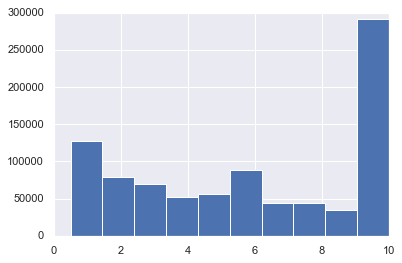

In [10]:
plt.hist(emp_len)

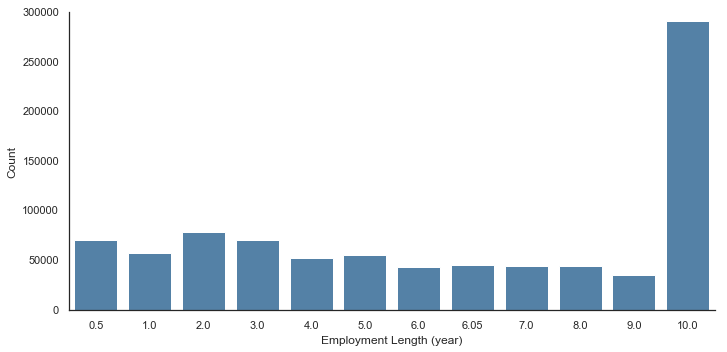

In [11]:
with sns.axes_style('white'):
    g1 = sns.catplot("emp_length_int", data=data, aspect=2, kind="count", color='steelblue')
    g1.set(xlabel='Employment Length (year)', ylabel='Count')
g1.savefig('emp_len_his.png')

* It does not seem like a classic distribution (normal or uniform).
* It is obvious that the last category takes up a high percentage.

In [12]:
(emp_len == 10).sum() / len(emp_len)

0.32857324773293034

* To be specific, 32.8% of the clients have a long term of employment (10 years).

1.5 Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x17c000086d8>,
 'caps': [<matplotlib.lines.Line2D at 0x17c00008e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c3b15a4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x17c00013550>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c000138d0>],
 'means': []}

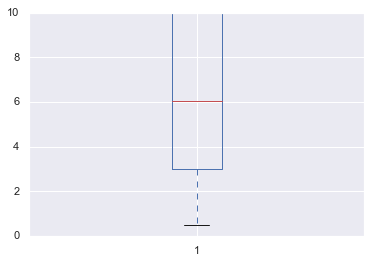

In [13]:
plt.boxplot(emp_len)

* The outcome is consistent.

# Feature 2 - Home ownership

2.1 Outline

In [14]:
home_own = data.iloc[:,6]
display(home_own.head())

0    1
1    1
2    1
3    1
4    1
Name: home_ownership_cat, dtype: int64

2.2 Unique values

In [15]:
home_own_cat = home_own.unique()
home_own_cat

array([1, 2, 3, 4, 5, 6], dtype=int64)

* type 1 - Rent, type 2 - Own, type 3 - Mortgage, type 4 - Other, type 5 - None, type 6 - Any.

2.3 Basic statistics

In [16]:
home_own.describe()

count    887379.000000
mean          2.099130
std           0.944839
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           6.000000
Name: home_ownership_cat, dtype: float64

* Notice that the min and 25% percentile are both 1, 50% and 75% percentile are both 3, which means type 1 and 3 each takes up at least 1/4 of whole dataset.

2.4 Histogram / Bar plot

(array([3.56117e+05, 0.00000e+00, 8.74700e+04, 0.00000e+00, 4.43557e+05,
        0.00000e+00, 1.82000e+02, 0.00000e+00, 5.00000e+01, 3.00000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

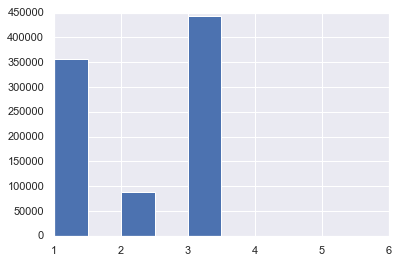

In [17]:
# Choice 1 Histogram (suitable for more categories)
plt.hist(home_own)
#t11 = ['', ' Rent', ' Own', ' Mortgage', ' Other', ' None', ' Any']
#plt.xticks(range(len(t11)), t11, size='small')

* When the types of category is small, better use simple bar plot.

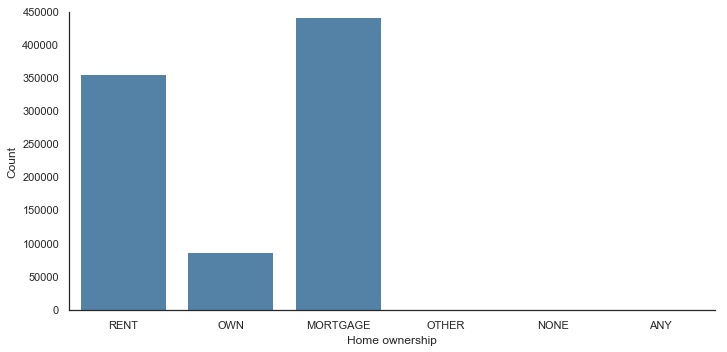

In [18]:
# Choice 2 Bar plot (suitable for few categories)
with sns.axes_style('white'):
    g2 = sns.catplot("home_ownership", data=data, aspect=2, kind="count", color='steelblue')
    g2.set(xlabel='Home ownership', ylabel='Count')
g2.savefig('hom_own_his.png')

In [19]:
((home_own==3)|(home_own==1)).sum()/len(home_own)

0.9011639896819735

In [20]:
((home_own==4)|(home_own==5)|(home_own==6)).sum()/len(home_own)

0.0002648248380906016

* To be specific, the last 3 types takes up only 0.03%, which can be ignored in the next step of analysis.
* Type "Rent" and "Mortgage" takes up over 90%, which might be our main focus in the next step of analysis.

# Feature 3 - Income

3.1 Outline

In [21]:
income = data.iloc[:,8]
display(income.head())

0    24000
1    30000
2    12252
3    49200
4    80000
Name: annual_inc, dtype: int64

In [22]:
income_cat = data.iloc[:,9]
display(income_cat.head())

0    1
1    1
2    1
3    1
4    1
Name: income_cat, dtype: int64

 3.2 Unique values

In [23]:
income_cat.unique()

array([1, 2, 3], dtype=int64)

* It does not mention the criteria for income type 1, 2 and 3, so we have to find out.

In [24]:
income[income_cat == 1].describe()

count    729616.000000
mean      58581.971748
std       20753.331500
min           0.000000
25%       42000.000000
50%       57000.000000
75%       75000.000000
max      100000.000000
Name: annual_inc, dtype: float64

In [25]:
income[income_cat == 2].describe()

count    140977.000000
mean     131578.972910
std       25188.435369
min      100000.000000
25%      110000.000000
50%      125000.000000
75%      148000.000000
max      200000.000000
Name: annual_inc, dtype: float64

In [26]:
income[income_cat == 3].describe()

count    1.678600e+04
mean     3.149025e+05
std      3.179370e+05
min      2.000010e+05
25%      2.250000e+05
50%      2.500000e+05
75%      3.150000e+05
max      9.500000e+06
Name: annual_inc, dtype: float64

 * type 1 - （0, 100000], type 2 - （100000, 200000], type 3 - (200000, 9500000]

3.3 Basic statistics

In [27]:
income.describe()

count    8.873790e+05
mean     7.502759e+04
std      6.469815e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [28]:
income_cat.describe()

count    887379.000000
mean          1.196702
std           0.442542
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: income_cat, dtype: float64

* It is noticeable that min and 75% percentile are both 1, which means that more than 75% of the clients belong to low income category. It is consistnet to the common sense.

3.4 Bar plot

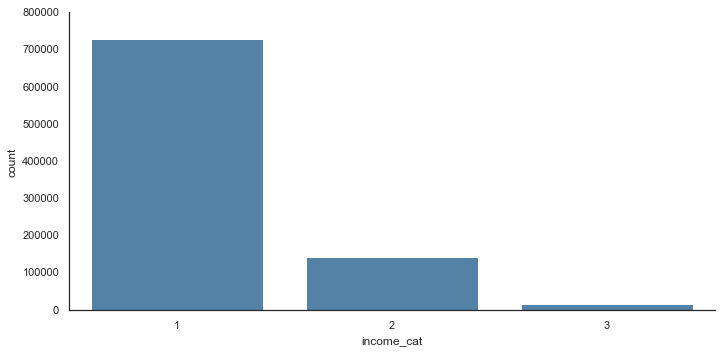

In [30]:
with sns.axes_style('white'):
    g = sns.catplot("income_cat", data=data, aspect=2,kind="count",color='steelblue')

In [31]:
(income_cat==1).sum()/len(income_cat)

0.8222146343332443

* More than 80% of the clients have low income.

# Feature 4 - Loan amount

4.1 Outline

In [32]:
loan_amount = data.iloc[:,10]
display(loan_amount.head())

0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amount, dtype: int64

4.2 Unique values

In [33]:
loan_amount.unique()

array([ 5000,  2500,  2400, ..., 32925, 32825, 32575], dtype=int64)

* Since the number of unique values is large, we can diretly use histogram in 4.4.

4.3 Basic statistics

In [34]:
loan_amount.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amount, dtype: float64

4.4 Histogram 

(array([ 48838., 136695., 165818., 123986., 118275., 112913.,  51364.,
         55561.,  27773.,  46156.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

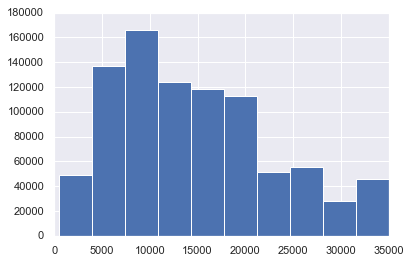

In [35]:
plt.hist(loan_amount)

* It looks like it is from a normal distribution. But we still need to testify it.

In [36]:
from scipy import stats
k1,p1 = stats.normaltest(loan_amount)
alpha = 5e-2
p1

0.0

In [37]:
if p1 < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


* However, according to the test, it is not from a normal distribution.

4.5 Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x17c006caf28>,
 'caps': [<matplotlib.lines.Line2D at 0x17c006d6978>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c006bb710>],
 'medians': [<matplotlib.lines.Line2D at 0x17c006d6e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c006e0438>],
 'means': []}

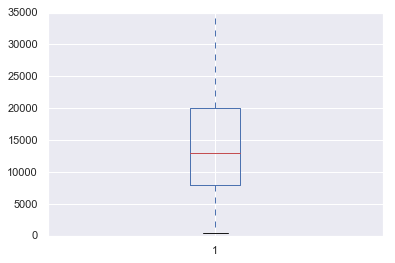

In [38]:
plt.boxplot(loan_amount)

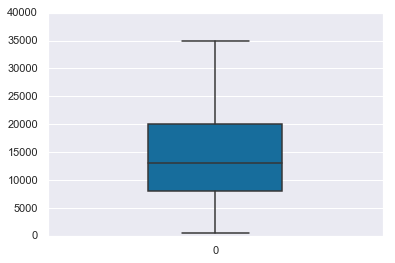

In [39]:
bplot = sns.boxplot(data=loan_amount, width=0.4, palette="colorblind")
bplot.set(ylim=(10, 40000))
plt.savefig('loa_amo_box.png')

# Feature 5 - Loan term

5.1 Outline

In [40]:
loan_term = data.iloc[:,11]
display(loan_term.head())

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [41]:
loan_term_cat = data.iloc[:,12]
display(loan_term_cat.head())

0    1
1    2
2    1
3    1
4    2
Name: term_cat, dtype: int64

5.2 Unique values

In [42]:
loan_term.unique()

array([' 36 months', ' 60 months'], dtype=object)

* type 1 - 36 months, type 2 - 60 months

5.3 Basic statistics

In [43]:
loan_term_cat.describe()

count    887379.000000
mean          1.300045
std           0.458278
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: term_cat, dtype: float64

5.4 Bar plot

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


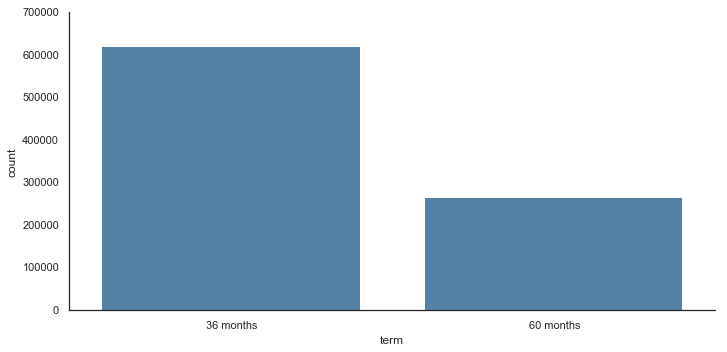

In [44]:
with sns.axes_style('white'):
    g = sns.factorplot("term", data=data, aspect=2,
                       kind="count", color='steelblue')

In [45]:
loan_term.str.contains('36 months').sum()/len(loan_term)

0.699954585357553

* There are only 2 categories of loan term, 36 months and 60 months, and the former one takes up nearly 70% of the whole column. 

5.5 pie chart

In [47]:
labels =['36 months', '60 months']
s1 = loan_term.str.contains('36 months').sum()/len(loan_term)
s2 = loan_term.str.contains('60 months').sum()/len(loan_term)
sizes = [s1, s2]

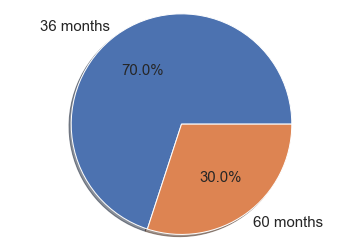

In [48]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,  textprops={'fontsize': 15})
ax1.axis('equal')
plt.savefig('loa_ter_pie.png')

# Feature 6 - Application type

6.1 Outline

In [49]:
apply_type = data.iloc[:,13]
display(apply_type.head())

0    INDIVIDUAL
1    INDIVIDUAL
2    INDIVIDUAL
3    INDIVIDUAL
4    INDIVIDUAL
Name: application_type, dtype: object

In [50]:
apply_type_cat = data.iloc[:,14]
display(apply_type_cat.head())

0    1
1    1
2    1
3    1
4    1
Name: application_type_cat, dtype: int64

6.2 Unique values

In [51]:
apply_type.unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

* type 1 - INDIVIDUAL, type 2 - JOINT

6.3 Basic statistics

In [52]:
apply_type_cat.describe()

count    887379.000000
mean          1.000576
std           0.023990
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: application_type_cat, dtype: float64

* Since min and 75% percentile are both 1, most application types are individual.

6.4 Bar plot

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


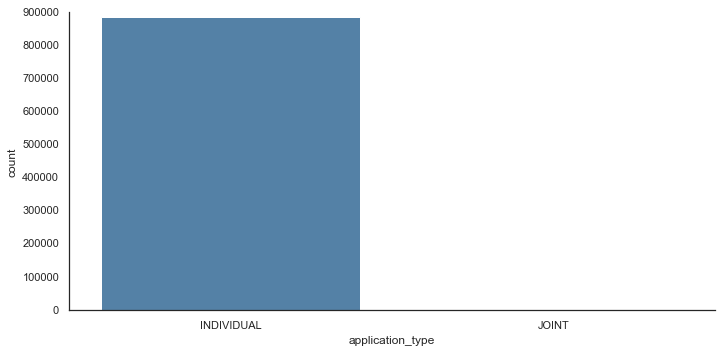

In [53]:
with sns.axes_style('white'):
    g = sns.factorplot("application_type", data=data, aspect=2,
                       kind="count", color='steelblue')

In [54]:
apply_type.str.contains('INDIVIDUAL').sum() / len(apply_type)

0.9994241468414286

* In fact, over 99.9% of the application type are individual, which we can focus on in the next step of analysis.

# Feature 7 - Purpose

7.1 Outline

In [55]:
purpose = data.iloc[:,15]
display(purpose.head())

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

In [56]:
purpose_cat = data.iloc[:,16]
display(purpose_cat.head())

0    1
1    2
2    3
3    4
4    4
Name: purpose_cat, dtype: int64

7.2 Unique values

In [57]:
purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [58]:
purpose_cat.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

* type 1 - credit_card, type 2 - car, type 3 - small_business, type 4 - other, type 5 - wedding, type 6 - debt_consolidation, type 7 - home_improvement, type 8 - major_purchase, type 9 - medical, type 10 - moving, type 11 - vacation, type 12 - house, type 13 - renewable_energy, type 14 - educational.

7.3 Basic statistics

In [59]:
purpose_cat.describe()

count    887379.000000
mean          4.874621
std           2.381156
min           1.000000
25%           3.000000
50%           6.000000
75%           6.000000
max          14.000000
Name: purpose_cat, dtype: float64

7.4 Bar plot

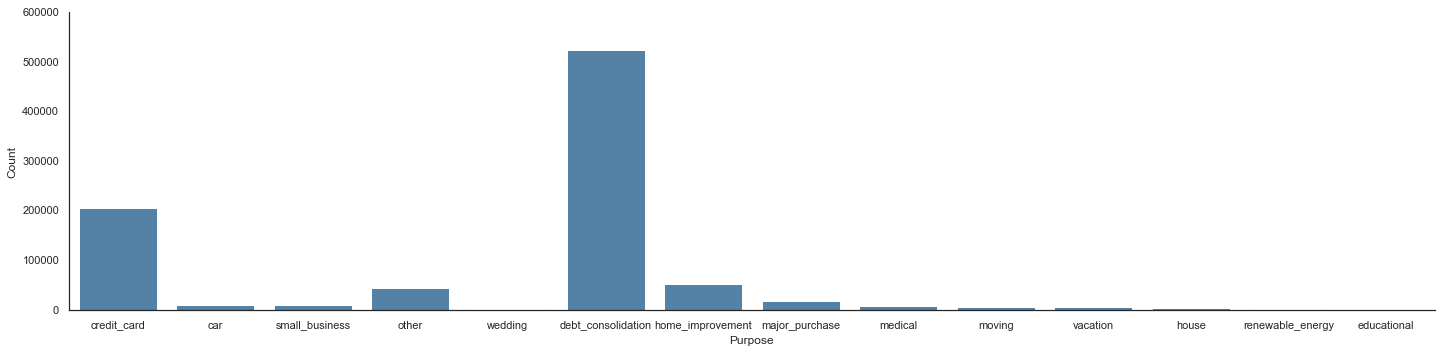

In [60]:
with sns.axes_style('white'):
    g7 = sns.catplot("purpose", data=data, aspect=4, kind="count", color='steelblue')
    g7.set(xlabel='Purpose', ylabel='Count')
    g7.savefig('pur_his.png')

In [61]:
purpose.str.contains('debt_consolidation').sum() / len(purpose)

0.5907453297858074

In [62]:
purpose.str.contains('credit_card').sum() / len(purpose)

0.2323494245412614

In [63]:
purpose.str.contains('home_improvement').sum() / len(purpose)

0.05840683631233103

In [64]:
purpose.str.contains('major_purchase').sum() / len(purpose)

0.019469696713580106

* According to the above plot, debt consolidation and credit card are 2 major purposes, taking up 59.1% and 23.2% respectively.

# Feature 8 - Interest payment

8.1 Outline

In [65]:
interest_pay = data.iloc[:,17]
display(interest_pay.head())

0     Low
1    High
2    High
3    High
4     Low
Name: interest_payments, dtype: object

In [66]:
interest_pay_cat = data.iloc[:,18]
display(interest_pay_cat.head())

0    1
1    2
2    2
3    2
4    1
Name: interest_payment_cat, dtype: int64

8.2 Unique values

In [67]:
interest_pay.unique()

array(['Low', 'High'], dtype=object)

In [68]:
interest_pay_cat.unique()

array([1, 2], dtype=int64)

* type 1 - Low, type 2 - High

8.3 Basic statistics

In [69]:
interest_pay_cat.describe()

count    887379.000000
mean          1.475629
std           0.499406
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: interest_payment_cat, dtype: float64

8.4 Bar plot

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


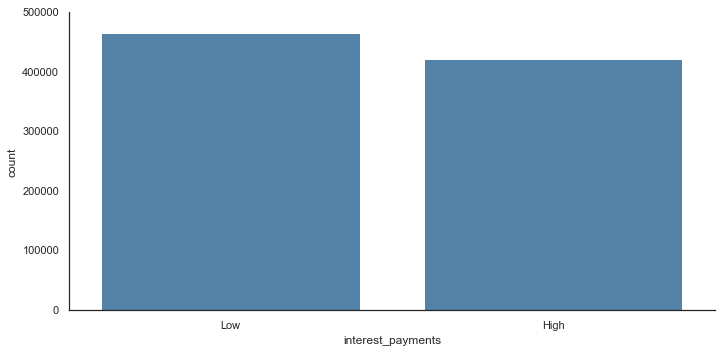

In [70]:
with sns.axes_style('white'):
    g = sns.factorplot("interest_payments", data=data, aspect=2,
                       kind="count", color='steelblue')

In [71]:
interest_pay.str.contains('Low').sum() / len(interest_pay)

0.5243712100466655

* The percentage of low interest payment and high interest payment are 52.4% and 47.6% respectively, which are close.

8.5 pie chart

In [72]:
labels2 =['Low', 'High']
s3 = interest_pay.str.contains('Low').sum()/len(interest_pay)
s4 = interest_pay.str.contains('High').sum()/len(interest_pay)
sizes = [s3, s4]

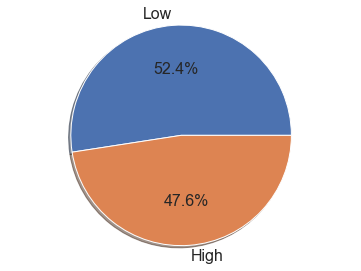

In [73]:
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels2, autopct='%1.1f%%', shadow=True,  textprops={'fontsize': 16})
ax2.axis('equal')
plt.savefig('int_pay_pie.png')

# Feature 9 Good / Bad loan

9.1 Outline

In [74]:
loan_con = data.iloc[:,19]
display(loan_con.head())

0    Good Loan
1     Bad Loan
2    Good Loan
3    Good Loan
4    Good Loan
Name: loan_condition, dtype: object

In [75]:
loan_con_cat = data.iloc[:,20]
display(loan_con_cat.head())

0    0
1    1
2    0
3    0
4    0
Name: loan_condition_cat, dtype: int64

9.2 Unique values

In [76]:
loan_con.unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

In [77]:
loan_con_cat.unique()

array([0, 1], dtype=int64)

* type 0 - Good Loan, type 1 - Bad Loan.

9.3 Basic statistics

In [78]:
loan_con_cat.describe()

count    887379.000000
mean          0.075987
std           0.264977
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: loan_condition_cat, dtype: float64

* Since min and 75% percentile are both 0, at least 75% of loan are good loan.

9.4 Bar plot 

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


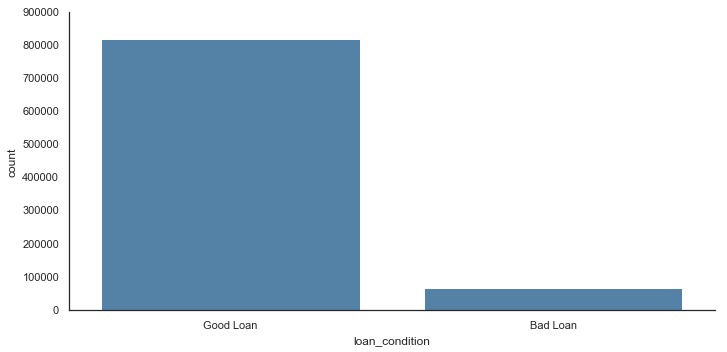

In [79]:
with sns.axes_style('white'):
    g = sns.factorplot("loan_condition", data=data, aspect=2, kind="count", color='steelblue')

In [80]:
loan_con.str.contains('Good Loan').sum() / len(loan_con)

0.9240133020952715

9.5 pie chart

In [81]:
labels3 =['Good Loan', 'Bad Loan']
s5 = loan_con.str.contains('Good Loan').sum()/len(loan_con)
s6 = loan_con.str.contains('Bad Loan').sum()/len(loan_con)
sizes = [s5, s6]

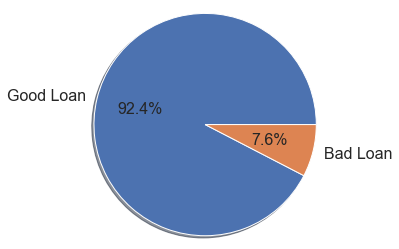

In [82]:
fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels3, autopct='%1.1f%%', shadow=True,  textprops={'fontsize': 16})
ax3.axis('equal')
plt.savefig('loa_con_pie.png')

* To be specific, 92.4% of loan are good loan.

# Feature 10 - Interest rate

10.1 Outline

In [83]:
int_rate = data.iloc[:,21]
display(int_rate.head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: interest_rate, dtype: float64

10.2 Unique values

In [84]:
int_rate.unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

10.3 Basic statistics

In [85]:
int_rate.describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: interest_rate, dtype: float64

10.4 Histogram

(array([ 87808., 147821., 159315., 199314., 125039.,  99867.,  32560.,
         23464.,  10906.,   1285.]),
 array([ 5.32 ,  7.687, 10.054, 12.421, 14.788, 17.155, 19.522, 21.889,
        24.256, 26.623, 28.99 ]),
 <a list of 10 Patch objects>)

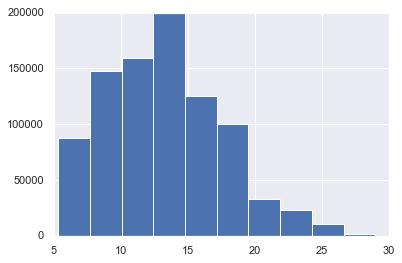

In [86]:
plt.hist(int_rate)

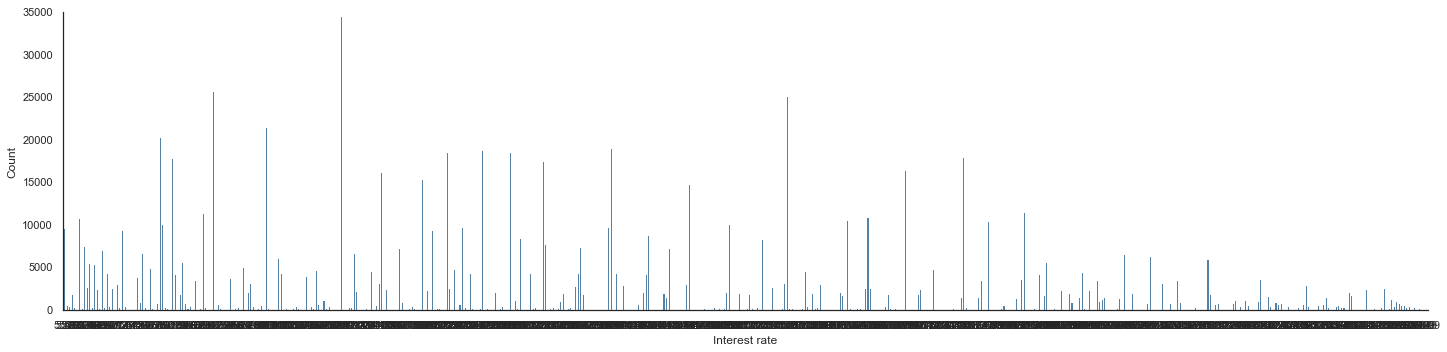

In [87]:
with sns.axes_style('white'):
    g10 = sns.catplot("interest_rate", data=data, aspect=4, kind="count", color='steelblue')
    g10.set(xlabel='Interest rate', ylabel='Count')
    g10.savefig('int_rat_his.png')

* They may be from a normal distribution, and we will conduct the following test, similar to 4.4.

In [88]:
k2,p2 = stats.normaltest(int_rate)
alpha = 5e-2
p2

0.0

In [89]:
if p2 < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


* Column interst rate is not from normal distribution.

# Feature 11 - Grade (by Lending Club)

11.1 Outline

In [90]:
grade = data.iloc[:,22]
display(grade.head())

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [91]:
grade_cat = data.iloc[:,23]
display(grade_cat.head())

0    2
1    3
2    3
3    3
4    2
Name: grade_cat, dtype: int64

11.2 Unique values

In [92]:
grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [93]:
grade_cat.unique()

array([2, 3, 1, 5, 6, 4, 7], dtype=int64)

* type 1 - A, type 2 - B, type 3 - C, type 4 - D, type 5 - E, type 6 - F, type 7 - G.

11.3 Basic statistics

In [94]:
grade_cat.describe()

count    887379.000000
mean          2.798403
std           1.312599
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: grade_cat, dtype: float64

11.4 Bar Plot

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


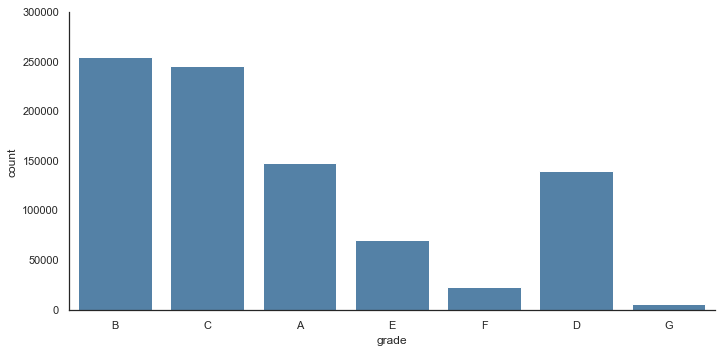

In [95]:
with sns.axes_style('white'):
    g = sns.factorplot("grade", data=data, aspect=2,
                       kind="count", color='steelblue')

In [96]:
(grade.str.contains('B').sum()+grade.str.contains('C').sum()) / len(grade)

0.5639022334312622

* Grade B and C takes up 56.4% of the column.

# Feature 12 - DTI

DTI: a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

12.1 Outline

In [97]:
dti = data.iloc[:,24]
display(dti.head())

0    27.65
1     1.00
2     8.72
3    20.00
4    17.94
Name: dti, dtype: float64

12.2 Unique values

In [98]:
dti.unique()

array([27.65,  1.  ,  8.72, ..., 45.77, 55.1 , 59.19])

10.3 Basic statistics

In [99]:
dti.describe()

count    887379.000000
mean         18.157039
std          17.190626
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        9999.000000
Name: dti, dtype: float64

10.4 Histogram 

(array([8.87376e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <a list of 10 Patch objects>)

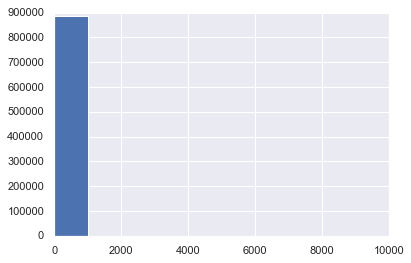

In [100]:
plt.hist(dti)

* The abnormal histogram implies existence of some outliners.

In [101]:
len(dti[dti<50]) / len(dti)

0.9999504157749958

* Since 99.99% of DTI are less than 50, we can conduct the following data cleansing/slicing.

(array([3.97060e+04, 1.11768e+05, 1.74999e+05, 1.90584e+05, 1.63611e+05,
        1.13676e+05, 6.51850e+04, 2.51820e+04, 2.59800e+03, 2.60000e+01]),
 array([ 0.   ,  4.891,  9.782, 14.673, 19.564, 24.455, 29.346, 34.237,
        39.128, 44.019, 48.91 ]),
 <a list of 10 Patch objects>)

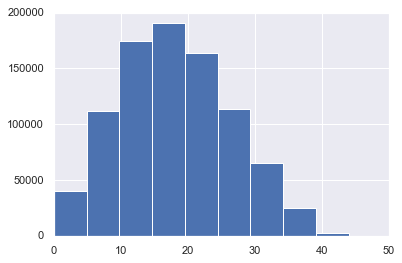

In [102]:
dti2 = dti[dti<50]
plt.hist(dti2)

* The new dataset seems more regular than before, then we will test if it is from a normal distribution.

In [103]:
k3,p3 = stats.normaltest(dti2)
alpha = 5e-2
p3

0.0

In [104]:
if p3 < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


* However, column dti is not from a normal distribution.

# Summary

Accroding to the above analysis, I have a preliminary understanding of this loan dataset. 
* Feature 9 (good / bad loan) should be the response / dependable variable for the classification model.
* Categorical variables, e.g. feature 2 (home ownership), feature 5 (loan term), feature 7 (purpose), feature 8 (interest payment), will be utilized to analyze how they influence the response varibale, or other variables, by some aggregation / group by methods.
* Numeric variables with more than 10 unique values, such as feature 1 (employment length), feature 3 (income), feature 4 (loan amount), feature 10 (interest rate), will be considered as major variables for the classification / regression model.
* As for feature 6 (application type), since 99.9% of this column belong to "individual", I will slice the column and focus on "individual". About feature 11 (grade), since its criteria is not mentioned, I intend to ignore this column. In addition, feature 12 (DTI) is linearly correlated to feature 3, 4, 5 and 10, so it can also be neglected in the future analysis.